In [1]:
from inhs_outlining import *

In [2]:
"""
unique_species_counts = Fish.count_unique_species()
fish_per_species = 100
labels = [species for species, count in unique_species_counts.items() if count >= fish_per_species]
dataset = []
for label in labels:
    all_fish_with_label = Fish.query(select(Fish).where(Fish.genus + ' ' + Fish.species == label))[:fish_per_species]
    for fish in all_fish_with_label:
        dataset.append(list(fish.features) + [label])
dataset = np.array(dataset)
np.savetxt("dataset.csv", dataset, fmt='%s', delimiter=',')
"""

'\nunique_species_counts = Fish.count_unique_species()\nfish_per_species = 100\nlabels = [species for species, count in unique_species_counts.items() if count >= fish_per_species]\ndataset = []\nfor label in labels:\n    all_fish_with_label = Fish.query(select(Fish).where(Fish.genus + \' \' + Fish.species == label))[:fish_per_species]\n    for fish in all_fish_with_label:\n        dataset.append(list(fish.features) + [label])\ndataset = np.array(dataset)\nnp.savetxt("dataset.csv", dataset, fmt=\'%s\', delimiter=\',\')\n'

In [15]:
dataset = np.genfromtxt("dataset.csv", dtype=str, delimiter=',')
dataset = np.array([row for row in dataset if row[-1] in ["Notropis Percobromus", "Notropis Dorsalis"]])
rows, cols = dataset.shape
splitind = rows // 3 * 2
maxfeats = cols-1
np.random.seed(0)
np.random.shuffle(dataset)
accuracies = []
for i in range(1, maxfeats):
    xs = np.round(dataset[:, :i].astype(float))
    xs = (xs - np.mean(xs, axis=0)) / np.std(xs, axis=0)
    ys = dataset[:, maxfeats]
    #clf = SVC(kernel="linear", random_state=0)
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(xs[:splitind, :], ys[:splitind])
    predictions = clf.predict(xs[splitind:])
    accuracies.append((i, np.sum(predictions == ys[splitind:]) / len(predictions)))
accuracies.sort(key=lambda p: -p[1])
for nfeat, acc in accuracies:
    print(str(nfeat).rjust(3), acc)

  7 0.6470588235294118
  6 0.6176470588235294
  8 0.6176470588235294
 12 0.5882352941176471
 51 0.5882352941176471
  9 0.5735294117647058
 25 0.5735294117647058
 66 0.5735294117647058
 15 0.5588235294117647
 24 0.5588235294117647
 26 0.5588235294117647
 67 0.5588235294117647
  4 0.5441176470588235
 68 0.5441176470588235
 70 0.5441176470588235
 22 0.5294117647058824
 23 0.5294117647058824
 69 0.5294117647058824
 71 0.5294117647058824
  3 0.5147058823529411
 10 0.5147058823529411
 14 0.5147058823529411
 16 0.5147058823529411
 18 0.5147058823529411
 28 0.5147058823529411
 31 0.5147058823529411
 36 0.5147058823529411
 52 0.5147058823529411
 62 0.5147058823529411
 72 0.5147058823529411
 73 0.5147058823529411
 74 0.5147058823529411
  1 0.5
  5 0.5
 11 0.5
 13 0.5
 19 0.5
 27 0.5
 29 0.5
 30 0.5
 32 0.5
 59 0.5
 65 0.5
 75 0.5
 20 0.4852941176470588
 21 0.4852941176470588
 34 0.4852941176470588
 50 0.4852941176470588
 60 0.4852941176470588
 64 0.4852941176470588
 97 0.4852941176470588
  2 0.4

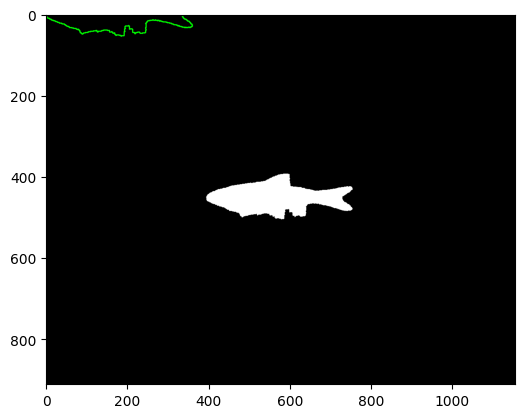

In [16]:
fish = Fish.with_id("6772")
fish.show_outline()

In [7]:
for y in list(np.unique(ys)):
    print(y)

Cyprinus Carpio
Esox Americanus
Gambusia Affinis
Lepomis Cyanellus
Lepomis Humilis
Lepomis Macrochirus
Lepomis Megalotis
Notropis Atherinoides
Notropis Boops
Notropis Buccatus
Notropis Dorsalis
Notropis Percobromus
Notropis Stramineus
Noturus Flavus
Phenacobius Mirabilis


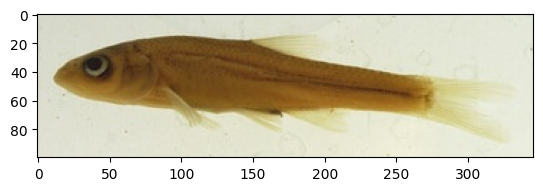

In [10]:
dorsalis = Fish.example_of("Notropis", "Dorsalis")

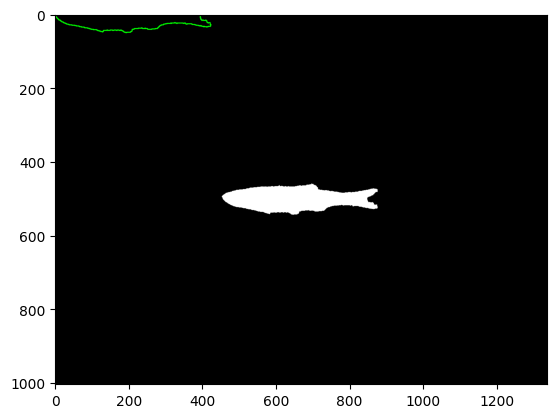

In [17]:
perco = Fish.example_of("Notropis", "Percobromus")
perco.show_outline()